In [78]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

class Planet():
    a = 0.
    e = 0.
    i = 0.
    LongP = 0.
    LongA = 0.
    MeanA = 0.
    x1 = 0.
    x2 = 0.
    x3 = 0.
    v1 = 0.
    v2 = 0.
    v3 = 0.
    Time = []
    Mass = 0.

def ReadData(FileName):
    planet = Planet()
    planet.Time, _, planet.a, planet.e, planet.i, planet.LongP, planet.LongA, planet.MeanA = np.loadtxt(FileName, unpack=True)
    planet.a = planet.a#/1.49597870700e11
    return planet

def ReadHNBody(FileName):
    planet = Planet()
    planet.Time, planet.a, planet.e, planet.i, planet.LongP, planet.LongA, planet.MeanA, planet.x1, planet.x2, planet.x3, planet.v1, planet.v2, planet.v3 = np.loadtxt(FileName, skiprows=17, unpack=True)
    planet.MeanA[planet.MeanA<0]+=360
    planet.LongP[planet.LongP<0]+=360
    planet.LongA[planet.LongA<0]+=360
    planet.a = planet.a
    return planet

Earth_Data = []
File_Names = ['Solo_Earth_'+x+'.txt' for x in ['01','005','001','0009','0008','0007','0006','0005','0004','0001']]    
for file in File_Names:
    Earth_Data.append(ReadData(file))

hnEarth = ReadHNBody('plan3.dat')
hnEarth.Mass = 1.


[ 4.99645732  6.2283681 ]


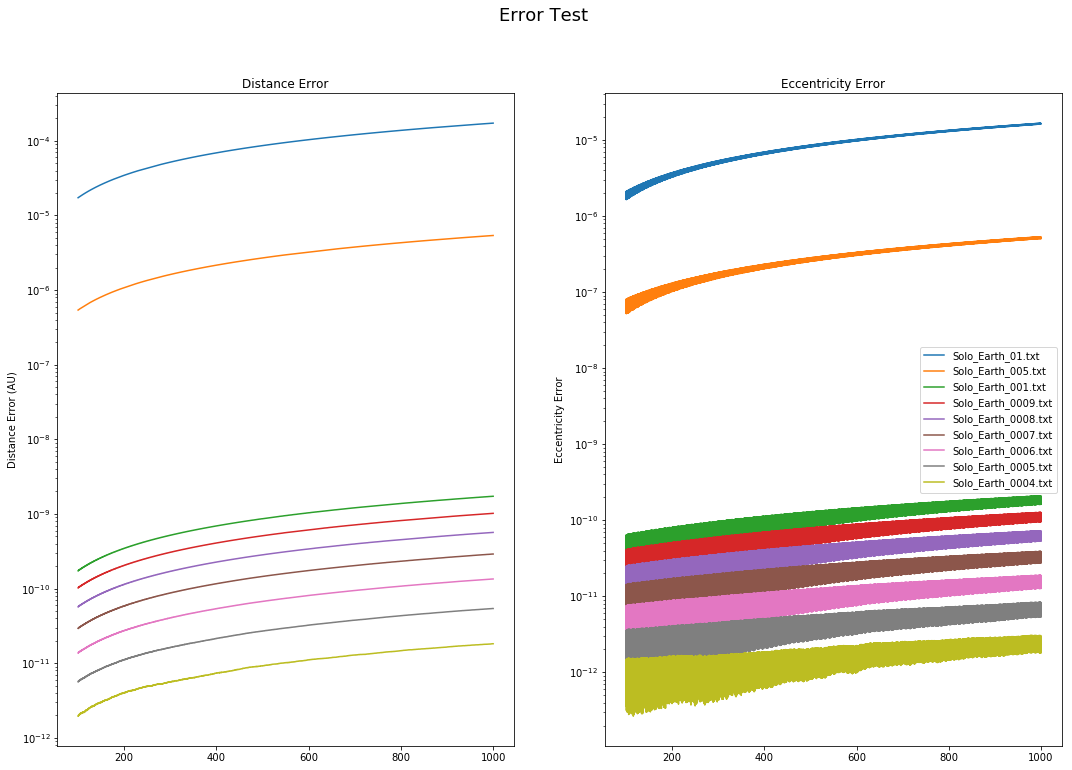

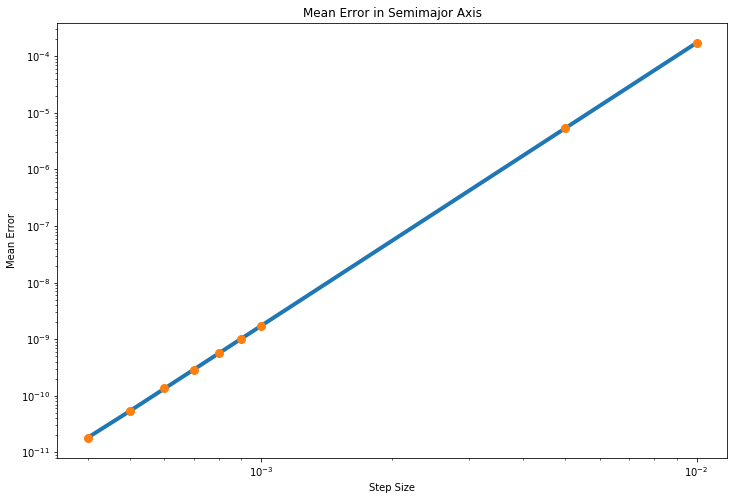

In [94]:
fig,([ax1,ax2])=plt.subplots(1,2,figsize=[18,12])
def PlotError(planet,Truth,Name,EndTime=1e13):
    array   = ((planet.Time <= EndTime) & (planet.Time > 100))
    fig.suptitle(Name,fontsize=18)
    ax1.semilogy(Truth.Time[array],(Truth.a[array]-planet.a[array]))
    End_Distance = (Truth.a[-1]-planet.a[-1])
    
    #plt.xlabel('Time (yrs)')
    ax1.set_ylabel('Distance Error (AU)')
    #ax1.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    ax1.set_title('Distance Error')
    
    ax2.semilogy(Truth.Time[array], (Truth.e[array]-planet.e[array]))
    #plt.xlabel('Time (yrs)')
    ax2.set_ylabel('Eccentricity Error')
    ax2.set_title('Eccentricity Error')
    
    return End_Distance

Means = np.zeros(np.size(Earth_Data[:-1]))
for i,Data in enumerate(Earth_Data[:-1]):
    Means[i]=PlotError(Data,Earth_Data[-1],'Error Test',1000)

plt.legend(File_Names[:-1])

plt.figure(figsize=[12,8])
h=[0.01,.005,.001,.0009,.0008,.0007,.0006,.0005,.0004]
plt.loglog(h,Means,lw=4)
plt.ylabel('Mean Error')
plt.title('Mean Error in Semimajor Axis')
plt.xlabel('Step Size')
#plt.gca().invert_xaxis()

Logh = np.log10(h)
LogErr = np.log10(Means)

Params = np.polyfit(Logh[::-1],LogErr[::-1],1)
z = np.poly1d(Params)
plt.loglog(10**Logh,10**(z(Logh)),'.',ms=16)
print(Params)